<h1>All Respondents Analysis</h1>

<h2>Load all data</h2>

In [9]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "all respondents data"

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2', 'ET_TimeSignal', 'EventSource.3']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
print(combined_data)


           Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
147733       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147734  0.195341  0.187637  0.027562  0.130503  0.043328  0.117269  0.057809   
147735  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
147736       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147737       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        Engagement  Valence  Sentimenta

In [10]:
print(combined_data.columns)

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll',
       'Interocular Distance', 'ET_PupilLeft', 'ET_PupilRight',
       'ET_DistanceLeft', 'ET_DistanceRight', 'ET_GazeLeftx', 'ET_GazeLefty',
       'ET_GazeRightx', 'ET_GazeRighty', 'ET_ValidityLeftEye',
       'ET_ValidityRightEye', 'ET_CameraLeftX', 'ET_CameraLeftY',
       'ET_CameraRightX', 'ET_CameraRightY', 'Gaze X', 'Gaze Y',
       'Interpolated Gaze X', 'Interpolated Gaze Y', 'Interpolated Distance',
       'Gaze Velocity', 'Gaze Acceleration', 'Fixation Index',
       'Fix

<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [12]:
import pandas as pd

facial_expressions_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data[facial_expressions_columns].copy()

# Drop rows that have NaN values in all columns
facial_expressions_data = facial_expressions_data.dropna(how='all')

facial_expressions_data.head()



,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
5,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,0.030948,...,0.000806,0.002685,0.027488,0.008689,0.443331,0.0,0.000345,6.757946,-1.150817,-0.977193
7,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,0.051102,...,0.002314,0.002068,0.027396,0.013201,0.406091,0.0,0.000376,3.458502,-0.160348,0.267830
9,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,0.0,0.043316,...,0.003132,0.002222,0.030377,0.019631,0.341483,0.0,0.000493,3.753664,-0.737176,0.388438
11,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,0.055529,0.328766,0.0,0.032416,...,0.003382,0.002643,0.029414,0.022291,0.300317,0.0,0.000636,4.180299,-0.449494,0.456045
13,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,0.055519,0.328766,0.0,0.028298,...,0.003895,0.002665,0.025747,0.033456,0.273545,0.0,0.000934,4.626769,-0.389839,0.613328


<h3>Calculate Statistics</h3>

In [13]:
facial_expressions_data.describe()

,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
count,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,...,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000,936917.000000
mean,1.789210,1.859828,0.560793,1.427717,1.664313,1.078596,1.481581,26.342286,-1.243809,1.123377,...,6.418785,1.815170,32.707067,0.847484,2.944674,3.564589,2.571804,-5.351897,-1.450593,1.056373
std,6.404628,10.485240,4.022705,6.178375,11.907768,5.106507,7.925603,33.628131,16.496304,5.272043,...,20.978138,8.159653,40.121276,3.890346,12.784691,12.460892,9.818373,10.180762,7.592957,4.372582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.746422,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.126274,-69.441238,-34.569847
25%,0.139561,0.187831,0.024912,0.136987,0.024135,0.125867,0.057255,0.328766,0.000000,0.014853,...,0.000814,0.005358,0.281566,0.016475,0.006056,0.002832,0.001761,-12.457028,-4.872414,-1.395715
50%,0.278667,0.194114,0.040634,0.227486,0.024495,0.128685,0.067624,1.717079,0.000000,0.077267,...,0.014712,0.043516,6.130017,0.080120,0.053411,0.070087,0.030536,-4.817038,-0.882336,0.920036
75%,1.191851,0.231713,0.421217,0.911785,0.026266,0.151988,0.205272,60.522987,0.000000,0.367645,...,0.413520,0.328920,77.487244,0.383637,0.411084,0.633370,0.471519,1.575253,2.286757,3.889163
max,97.433800,99.885056,99.332336,99.734726,99.979660,99.033897,99.988937,99.981064,99.967102,99.858139,...,100.000000,99.997185,100.000000,99.951042,100.000000,99.603455,99.996376,43.438602,48.829636,40.203255


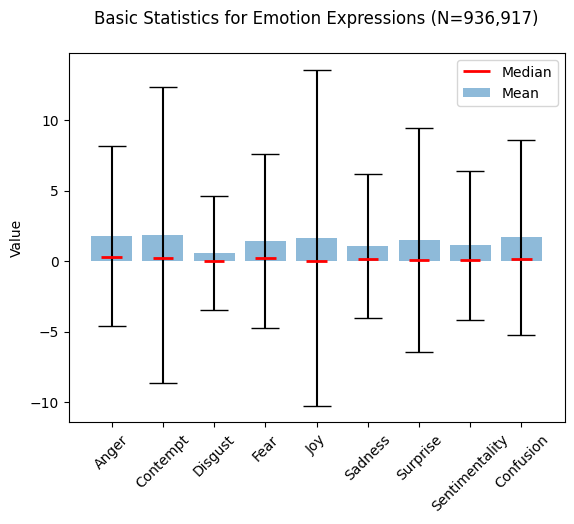

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics for the selected columns
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Sentimentality', 'Confusion']
stats = facial_expressions_data[selected_columns].describe()

# Extract the mean and standard deviation values
mean_values = stats.loc['mean']
std_values = stats.loc['std']
median_values = stats.loc['50%']

# Create a bar chart of the mean values, with error bars representing the standard deviation
x_labels = selected_columns
x_pos = np.arange(len(x_labels))
fig, ax = plt.subplots()
ax.bar(x_pos, mean_values, yerr=std_values, align='center', alpha=0.5, ecolor='black', capsize=10, label='Mean')
ax.hlines(median_values, x_pos - 0.2, x_pos + 0.2, colors='red', linewidth=2, label='Median')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel('Value')
# ax.set_title('Basic Statistics for Emotion Expressions (N=' + str(len(facial_expressions_data)) + ')\n')
ax.set_title('Basic Statistics for Emotion Expressions (N={:,})\n'.format(len(facial_expressions_data)))
ax.legend()

# Show the chart
plt.show()

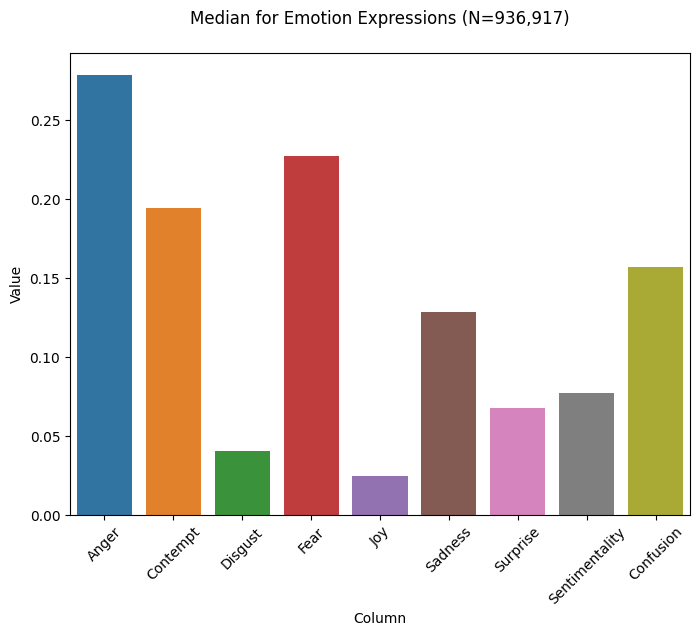

In [41]:
import seaborn as sns

# Set the figure size to (8, 6) inches
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot of the median values
sns.barplot(x=median_values.index, y=median_values.values, ax=ax)

# Set the x-axis label rotation to 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Set the plot title and axis labels
plt.title('Median for Emotion Expressions (N={:,})\n'.format(len(facial_expressions_data)))
plt.xlabel('Column')
plt.ylabel('Value')

# Show the plot
plt.show()